In [1]:
import numpy as np

In [2]:
#UNTUK NILAI IMPOR
class Neural_Network(object):
    def __init__(self):
        #parameters
        self.inputLayerSize = 5
        self.outputLayerSize = 1
        self.hiddenLayerSize = 8

        #weights
        self.W1 = np.random.randn(self.inputLayerSize,\
                                 self.hiddenLayerSize)  
        self.W2 = np.random.randn(self.hiddenLayerSize,\
                                 self.outputLayerSize)  
    
    def printw(self):
        return self.W1
        
    def weight(self, W1, W2):
        #Make an internal variable for the weight:
        self.W1 = W1
        self.W2 = W2
        
    def forward(self, X):
        #forward propagation through our network
        self.z2 = np.dot(X,self.W1)  
        self.a2 = self.sigmoid(self.z2)  # activation function
        self.z3 = np.dot(self.a2, self.W2) 
        yHat = self.sigmoid(self.z3)  # final activation function
        return yHat

    def sigmoid(self, z):
        # activation function
        return 1 / (1 + np.exp(-z))
    
    def sigmoidPrime(self,z): 
        #derivative of sigmoid     
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self,X,y):
        self.yHat = self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self,X,y):
        self.yHat=self.forward(X)
        
        delta3=np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        
        delta2=np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2
    
    def predict(self):
        prediksi = self.forward(dataprediksi)
        return prediksi
    
    def getParams(self):
        params=np.concatenate((self.W1.ravel(),self.W2.ravel()))
        return params
    
    def setParams(self,params):
        W1_start=0
        W1_end=self.hiddenLayerSize*self.inputLayerSize
        self.W1=np.reshape(params[W1_start:W1_end],\
                          (self.inputLayerSize,self.hiddenLayerSize))
        W2_end=W1_end+self.hiddenLayerSize*self.outputLayerSize
        self.W2=np.reshape(params[W1_end:W2_end],\
                          (self.hiddenLayerSize,self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [3]:
NN = Neural_Network()

In [4]:
NN.W1

array([[-1.0046909 ,  1.10572764,  1.29635381,  0.39805721,  0.40929053,
        -0.66145188,  0.07900425,  1.5321565 ],
       [ 0.84027619,  0.90244287,  0.62702182,  1.61826423,  0.43502842,
        -1.04864365, -1.38658284, -2.27210721],
       [-1.36389981, -0.58859449,  0.44976626, -0.07289581, -0.40319253,
        -2.78636957,  1.34859199,  0.32925271],
       [ 0.74542034,  0.11229765,  0.588945  , -0.27079   ,  0.27448744,
         1.12708382,  0.00331807, -0.99301577],
       [ 0.155476  , -0.2483921 ,  0.41500403, -2.36771447,  0.18761304,
        -0.45269928,  0.16774187,  1.33888579]])

In [5]:
NN.W2

array([[ 0.99336963],
       [ 2.0940154 ],
       [ 0.58449534],
       [-0.40563712],
       [ 0.10555107],
       [-0.67863561],
       [-0.56255937],
       [-0.69723985]])

In [6]:
#NILAI IMPOR
X=np.array(([	0.570422535	,	0.112113419	,	0.423360552	,	0.311558554	,	0.422995385	]	,
[	0.669014085	,	0.170734062	,	0.311558554	,	0.422995385	,	0.424780646	]	,
[	0.697183099	,	0.223256598	,	0.422995385	,	0.424780646	,	0.322057108	]	,
[	0.971830986	,	0.241974687	,	0.424780646	,	0.322057108	,	0.460465588	]	,
[	0.591549296	,	0.365733465	,	0.322057108	,	0.460465588	,	0.166688644	]	,
[	0.281690141	,	0.552558994	,	0.460465588	,	0.166688644	,	0.401744687	]	,
[	0.26056338	,	0.370023519	,	0.166688644	,	0.401744687	,	0.316478166	]	,
[	0.464788732	,	0.332531703	,	0.401744687	,	0.316478166	,	0.270862707	]	,
[	0.992957746	,	0.387887522	,	0.316478166	,	0.270862707	,	0.312512045	]	,
[	0.676056338	,	0.398363943	,	0.270862707	,	0.312512045	,	0.369092661	]	,
[	0.253521127	,	0.284826299	,	0.312512045	,	0.369092661	,	0.205751382	]	,
[	0.450704225	,	0.186735022	,	0.369092661	,	0.205751382	,	0.176193133	]	,
[	0	,	0.182694768	,	0.205751382	,	0.176193133	,	0.290419435	]	,
[	0.485915493	,	0.255617002	,	0.176193133	,	0.290419435	,	0.24090886	]	,
[	0.781690141	,	0.23597043	,	0.290419435	,	0.24090886	,	0.27408835	]	,
[	0.802816901	,	0.164134134	,	0.24090886	,	0.27408835	,	0.370908353	]	,
[	0.302816901	,	0.178176635	,	0.27408835	,	0.370908353	,	0.05869047	]	,
[	0.471830986	,	0.163956101	,	0.370908353	,	0.05869047	,	0.400324593	]	,
[	0.415492958	,	0.133241484	,	0.05869047	,	0.400324593	,	0.289993407	]	,
[	0.647887324	,	0.226399017	,	0.400324593	,	0.289993407	,	0.307714155	]	,
[	0.612676056	,	0.255013861	,	0.289993407	,	0.307714155	,	0.429152508	]	,
[	1	,	0.23708614	,	0.307714155	,	0.429152508	,	0.440624842	]	,
[	0.478873239	,	0.231651119	,	0.429152508	,	0.440624842	,	0.358046356	]	,
[	0.302816901	,	0.233067608	,	0.440624842	,	0.358046356	,	0.295724502	]	,
[	0.38028169	,	0.221173719	,	0.358046356	,	0.295724502	,	0.491413501	]	,
[	0.591549296	,	0.22633168	,	0.295724502	,	0.491413501	,	0.356240807	]	,
[	0.802816901	,	0.218698642	,	0.491413501	,	0.356240807	,	0.541055942	]	,
[	0.471830986	,	0.232032203	,	0.356240807	,	0.541055942	,	0.157529036	]	,
[	0.267605634	,	0.231947948	,	0.541055942	,	0.157529036	,	0.55294416	]	,
[	0.408450704	,	0.221547817	,	0.157529036	,	0.55294416	,	0.514337881	]	,
[	0.323943662	,	0.287958581	,	0.55294416	,	0.514337881	,	0.441213166	]	,
[	0.457746479	,	0.28837327	,	0.514337881	,	0.441213166	,	0.58940001	]	,
[	0.816901408	,	0.297145757	,	0.441213166	,	0.58940001	,	0.677070548	]	,
[	0.753521127	,	0.243669818	,	0.58940001	,	0.677070548	,	0.67615763	]	,
[	0.436619718	,	0.307437314	,	0.677070548	,	0.67615763	,	0.696941725	]	,
[	0.457746479	,	0.358597855	,	0.67615763	,	0.696941725	,	0.582938581	]	,
[	0.387323944	,	0.372181217	,	0.696941725	,	0.582938581	,	0.611147741	]	,
[	0.464788732	,	0.450259481	,	0.582938581	,	0.611147741	,	0.783455901	]	,
[	0.732394366	,	0.443095634	,	0.611147741	,	0.783455901	,	0.935669727	]	,
[	0.514084507	,	0.558155976	,	0.783455901	,	0.935669727	,	0.286990922	]	,
[	0.281690141	,	0.602359827	,	0.935669727	,	0.286990922	,	1	]	,
[	0.190140845	,	0.696291723	,	0.286990922	,	1	,	0.849977177	]	,
[	0.514084507	,	0.790604671	,	1	,	0.849977177	,	0.626008013	]	,
[	0.507042254	,	0.644022227	,	0.849977177	,	0.626008013	,	0.936146473	]	,
[	0.753521127	,	0.583228643	,	0.626008013	,	0.936146473	,	0.858467312	]	,
[	0.542253521	,	0.481715009	,	0.936146473	,	0.858467312	,	0.702581529	]	,
[	0.26056338	,	0.442812107	,	0.858467312	,	0.702581529	,	0.664685297	]	,
[	0.394366197	,	0.496270585	,	0.702581529	,	0.664685297	,	0.384176092	]	,
[	0.626760563	,	0.475463393	,	0.664685297	,	0.384176092	,	0.50844449	]	,
[	0.795774648	,	0.551559791	,	0.384176092	,	0.50844449	,	0.706050616	]	,
[	0.704225352	,	0.500994351	,	0.50844449	,	0.706050616	,	0.625663133	]	,
[	0.535211268	,	0.445458587	,	0.706050616	,	0.625663133	,	0.310067454	]	,
[	0.401408451	,	0.505711667	,	0.625663133	,	0.310067454	,	0.718151849	]	,
[	0.126760563	,	0.465889036	,	0.310067454	,	0.718151849	,	0.581295329	]	,
[	0.330985915	,	0.46785659	,	0.718151849	,	0.581295329	,	0.590840392	]	,
[	0.415492958	,	0.453001423	,	0.581295329	,	0.590840392	,	0.641121875	]	,
[	0.556338028	,	0.437411724	,	0.590840392	,	0.641121875	,	0.700096364	]	,
[	0.591549296	,	0.350673696	,	0.641121875	,	0.700096364	,	0.614971852	]	,
[	0.514084507	,	0.364031312	,	0.700096364	,	0.614971852	,	0.591377999	]	,


)           
,dtype=float)
y=np.array(([	0.424780646	]	,
[	0.322057108	]	,
[	0.460465588	]	,
[	0.166688644	]	,
[	0.401744687	]	,
[	0.316478166	]	,
[	0.270862707	]	,
[	0.312512045	]	,
[	0.369092661	]	,
[	0.205751382	]	,
[	0.176193133	]	,
[	0.290419435	]	,
[	0.24090886	]	,
[	0.27408835	]	,
[	0.370908353	]	,
[	0.05869047	]	,
[	0.400324593	]	,
[	0.289993407	]	,
[	0.307714155	]	,
[	0.429152508	]	,
[	0.440624842	]	,
[	0.358046356	]	,
[	0.295724502	]	,
[	0.491413501	]	,
[	0.356240807	]	,
[	0.541055942	]	,
[	0.157529036	]	,
[	0.55294416	]	,
[	0.514337881	]	,
[	0.441213166	]	,
[	0.58940001	]	,
[	0.677070548	]	,
[	0.67615763	]	,
[	0.696941725	]	,
[	0.582938581	]	,
[	0.611147741	]	,
[	0.783455901	]	,
[	0.935669727	]	,
[	0.286990922	]	,
[	1	]	,
[	0.849977177	]	,
[	0.626008013	]	,
[	0.936146473	]	,
[	0.858467312	]	,
[	0.702581529	]	,
[	0.664685297	]	,
[	0.384176092	]	,
[	0.50844449	]	,
[	0.706050616	]	,
[	0.625663133	]	,
[	0.310067454	]	,
[	0.718151849	]	,
[	0.581295329	]	,
[	0.590840392	]	,
[	0.641121875	]	,
[	0.700096364	]	,
[	0.614971852	]	,
[	0.591377999	]	,
[	0.32	]	,

)
,dtype=float)

dataprediksi = np.array(([	0.387323944	,	0.795380412	,	0.614971852	,	0.591377999	,	0.32	]	,
[	0.373239437	,	1	,	0.591377999	,	0.32	,	0.50	]	,
[	0.366197183	,	0.707681705	,	0.32	,	0.50	,	0.415539889	]	,
[	0.443661972	,	0.491695324	,	0.50	,	0.415539889	,	0	]	,

), dtype=float)


In [7]:
import matplotlib.pyplot as plot

In [8]:
from scipy import optimize

In [9]:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 100, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [10]:
NN=Neural_Network()

In [11]:
T = trainer(NN)

In [12]:
#Train network with new data:
T = trainer(NN)
T.train(X,y)

         Current function value: 0.470809
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105


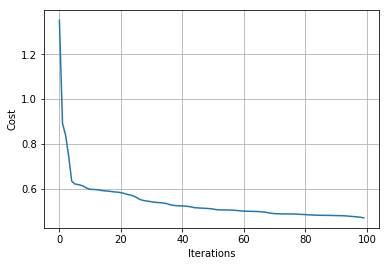

In [13]:
#Plot cost during training:
plot.plot(T.J)
plot.grid(1)
plot.xlabel('Iterations')
plot.ylabel('Cost')
plot.show()

In [14]:
#Training Data:
trainX = np.array(([	0.570422535	,	0.112113419	,	0.423360552	,	0.311558554	,	0.422995385	]	,
[	0.669014085	,	0.170734062	,	0.311558554	,	0.422995385	,	0.424780646	]	,
[	0.697183099	,	0.223256598	,	0.422995385	,	0.424780646	,	0.322057108	]	,
[	0.971830986	,	0.241974687	,	0.424780646	,	0.322057108	,	0.460465588	]	,
[	0.591549296	,	0.365733465	,	0.322057108	,	0.460465588	,	0.166688644	]	,
[	0.281690141	,	0.552558994	,	0.460465588	,	0.166688644	,	0.401744687	]	,
[	0.26056338	,	0.370023519	,	0.166688644	,	0.401744687	,	0.316478166	]	,
[	0.464788732	,	0.332531703	,	0.401744687	,	0.316478166	,	0.270862707	]	,
[	0.992957746	,	0.387887522	,	0.316478166	,	0.270862707	,	0.312512045	]	,
[	0.676056338	,	0.398363943	,	0.270862707	,	0.312512045	,	0.369092661	]	,
[	0.253521127	,	0.284826299	,	0.312512045	,	0.369092661	,	0.205751382	]	,
[	0.450704225	,	0.186735022	,	0.369092661	,	0.205751382	,	0.176193133	]	,
[	0	,	0.182694768	,	0.205751382	,	0.176193133	,	0.290419435	]	,
[	0.485915493	,	0.255617002	,	0.176193133	,	0.290419435	,	0.24090886	]	,
[	0.781690141	,	0.23597043	,	0.290419435	,	0.24090886	,	0.27408835	]	,
[	0.802816901	,	0.164134134	,	0.24090886	,	0.27408835	,	0.370908353	]	,
[	0.302816901	,	0.178176635	,	0.27408835	,	0.370908353	,	0.05869047	]	,
[	0.471830986	,	0.163956101	,	0.370908353	,	0.05869047	,	0.400324593	]	,
[	0.415492958	,	0.133241484	,	0.05869047	,	0.400324593	,	0.289993407	]	,
[	0.647887324	,	0.226399017	,	0.400324593	,	0.289993407	,	0.307714155	]	,
[	0.612676056	,	0.255013861	,	0.289993407	,	0.307714155	,	0.429152508	]	,
[	1	,	0.23708614	,	0.307714155	,	0.429152508	,	0.440624842	]	,
[	0.478873239	,	0.231651119	,	0.429152508	,	0.440624842	,	0.358046356	]	,
[	0.302816901	,	0.233067608	,	0.440624842	,	0.358046356	,	0.295724502	]	,
[	0.38028169	,	0.221173719	,	0.358046356	,	0.295724502	,	0.491413501	]	,
[	0.591549296	,	0.22633168	,	0.295724502	,	0.491413501	,	0.356240807	]	,
[	0.802816901	,	0.218698642	,	0.491413501	,	0.356240807	,	0.541055942	]	,
[	0.471830986	,	0.232032203	,	0.356240807	,	0.541055942	,	0.157529036	]	,
[	0.267605634	,	0.231947948	,	0.541055942	,	0.157529036	,	0.55294416	]	,
[	0.408450704	,	0.221547817	,	0.157529036	,	0.55294416	,	0.514337881	]	,
[	0.323943662	,	0.287958581	,	0.55294416	,	0.514337881	,	0.441213166	]	,
[	0.457746479	,	0.28837327	,	0.514337881	,	0.441213166	,	0.58940001	]	,
[	0.816901408	,	0.297145757	,	0.441213166	,	0.58940001	,	0.677070548	]	,
[	0.753521127	,	0.243669818	,	0.58940001	,	0.677070548	,	0.67615763	]	,
[	0.436619718	,	0.307437314	,	0.677070548	,	0.67615763	,	0.696941725	]	,
[	0.457746479	,	0.358597855	,	0.67615763	,	0.696941725	,	0.582938581	]	,
[	0.387323944	,	0.372181217	,	0.696941725	,	0.582938581	,	0.611147741	]	,
[	0.464788732	,	0.450259481	,	0.582938581	,	0.611147741	,	0.783455901	]	,
[	0.732394366	,	0.443095634	,	0.611147741	,	0.783455901	,	0.935669727	]	,
[	0.514084507	,	0.558155976	,	0.783455901	,	0.935669727	,	0.286990922	]	,
[	0.281690141	,	0.602359827	,	0.935669727	,	0.286990922	,	1	]	,
[	0.190140845	,	0.696291723	,	0.286990922	,	1	,	0.849977177	]	,
[	0.514084507	,	0.790604671	,	1	,	0.849977177	,	0.626008013	]	,
[	0.507042254	,	0.644022227	,	0.849977177	,	0.626008013	,	0.936146473	]	,
[	0.753521127	,	0.583228643	,	0.626008013	,	0.936146473	,	0.858467312	]	,
[	0.542253521	,	0.481715009	,	0.936146473	,	0.858467312	,	0.702581529	]	,

)
, dtype=float)
trainY = np.array(([	0.424780646	]	,
[	0.322057108	]	,
[	0.460465588	]	,
[	0.166688644	]	,
[	0.401744687	]	,
[	0.316478166	]	,
[	0.270862707	]	,
[	0.312512045	]	,
[	0.369092661	]	,
[	0.205751382	]	,
[	0.176193133	]	,
[	0.290419435	]	,
[	0.24090886	]	,
[	0.27408835	]	,
[	0.370908353	]	,
[	0.05869047	]	,
[	0.400324593	]	,
[	0.289993407	]	,
[	0.307714155	]	,
[	0.429152508	]	,
[	0.440624842	]	,
[	0.358046356	]	,
[	0.295724502	]	,
[	0.491413501	]	,
[	0.356240807	]	,
[	0.541055942	]	,
[	0.157529036	]	,
[	0.55294416	]	,
[	0.514337881	]	,
[	0.441213166	]	,
[	0.58940001	]	,
[	0.677070548	]	,
[	0.67615763	]	,
[	0.696941725	]	,
[	0.582938581	]	,
[	0.611147741	]	,
[	0.783455901	]	,
[	0.935669727	]	,
[	0.286990922	]	,
[	1	]	,
[	0.849977177	]	,
[	0.626008013	]	,
[	0.936146473	]	,
[	0.858467312	]	,
[	0.702581529	]	,
[	0.664685297	]	,

)
, dtype=float)

#Testing Data:
testX = np.array(([	0.26056338	,	0.442812107	,	0.858467312	,	0.702581529	,	0.664685297	]	,
[	0.394366197	,	0.496270585	,	0.702581529	,	0.664685297	,	0.384176092	]	,
[	0.626760563	,	0.475463393	,	0.664685297	,	0.384176092	,	0.50844449	]	,
[	0.795774648	,	0.551559791	,	0.384176092	,	0.50844449	,	0.706050616	]	,
[	0.704225352	,	0.500994351	,	0.50844449	,	0.706050616	,	0.625663133	]	,
[	0.535211268	,	0.445458587	,	0.706050616	,	0.625663133	,	0.310067454	]	,
[	0.401408451	,	0.505711667	,	0.625663133	,	0.310067454	,	0.718151849	]	,
[	0.126760563	,	0.465889036	,	0.310067454	,	0.718151849	,	0.581295329	]	,
[	0.330985915	,	0.46785659	,	0.718151849	,	0.581295329	,	0.590840392	]	,
[	0.415492958	,	0.453001423	,	0.581295329	,	0.590840392	,	0.641121875	]	,
[	0.556338028	,	0.437411724	,	0.590840392	,	0.641121875	,	0.700096364	]	,
[	0.591549296	,	0.350673696	,	0.641121875	,	0.700096364	,	0.614971852	]	,
[	0.514084507	,	0.364031312	,	0.700096364	,	0.614971852	,	0.591377999	]	,

)
, dtype=float)
testY = np.array(([	0.384176092	]	,
[	0.50844449	]	,
[	0.706050616	]	,
[	0.625663133	]	,
[	0.310067454	]	,
[	0.718151849	]	,
[	0.581295329	]	,
[	0.590840392	]	,
[	0.641121875	]	,
[	0.700096364	]	,
[	0.614971852	]	,
[	0.591377999	]	,
[	0.32	]	,

)
, dtype=float)


dataprediksi = np.array(([	0.387323944	,	0.795380412	,	0.614971852	,	0.591377999	,	0.32	]	,
[	0.373239437	,	1	,	0.591377999	,	0.32	,	0.50	]	,
[	0.366197183	,	0.707681705	,	0.32	,	0.50	,	0.415539889	]	,
[	0.443661972	,	0.491695324	,	0.50	,	0.415539889	,	0	]	,

), dtype=float)

In [15]:
testX

array([[0.26056338, 0.44281211, 0.85846731, 0.70258153, 0.6646853 ],
       [0.3943662 , 0.49627058, 0.70258153, 0.6646853 , 0.38417609],
       [0.62676056, 0.47546339, 0.6646853 , 0.38417609, 0.50844449],
       [0.79577465, 0.55155979, 0.38417609, 0.50844449, 0.70605062],
       [0.70422535, 0.50099435, 0.50844449, 0.70605062, 0.62566313],
       [0.53521127, 0.44545859, 0.70605062, 0.62566313, 0.31006745],
       [0.40140845, 0.50571167, 0.62566313, 0.31006745, 0.71815185],
       [0.12676056, 0.46588904, 0.31006745, 0.71815185, 0.58129533],
       [0.33098592, 0.46785659, 0.71815185, 0.58129533, 0.59084039],
       [0.41549296, 0.45300142, 0.58129533, 0.59084039, 0.64112187],
       [0.55633803, 0.43741172, 0.59084039, 0.64112187, 0.70009636],
       [0.5915493 , 0.3506737 , 0.64112187, 0.70009636, 0.61497185],
       [0.51408451, 0.36403131, 0.70009636, 0.61497185, 0.591378  ]])

In [16]:
##Need to modify trainer class a bit to check testing error during training:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
        self.testJ.append(self.N.costFunction(self.testX, self.testY))
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, trainX, trainY, testX, testY):
        #Make an internal variable for the callback function:
        self.X = trainX
        self.y = trainY
        
        self.testX = testX
        self.testY = testY

        #Make empty list to store training costs:
        self.J = []
        self.testJ = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 100, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(trainX, trainY), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [17]:
#Train network with new data:
NN = Neural_Network()

T = trainer(NN)
T.train(trainX, trainY, testX, testY)

         Current function value: 0.242261
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105


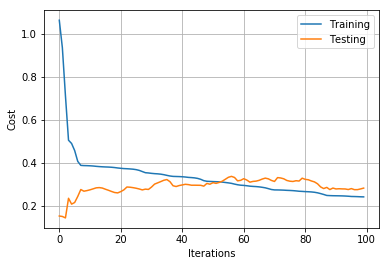

In [18]:
#Plot cost during training:
plot.plot(T.J)
plot.plot(T.testJ)
plot.grid(1)
plot.xlabel('Iterations')
plot.ylabel('Cost')
plot.legend(['Training', 'Testing'])
plot.show()

In [19]:
T.J

[array([1.06416486]),
 array([0.93626582]),
 array([0.7128498]),
 array([0.50592058]),
 array([0.49067779]),
 array([0.45777523]),
 array([0.4075142]),
 array([0.38883619]),
 array([0.38786252]),
 array([0.38751069]),
 array([0.38690082]),
 array([0.38588507]),
 array([0.38438565]),
 array([0.38317612]),
 array([0.38226581]),
 array([0.38153559]),
 array([0.38097205]),
 array([0.38008363]),
 array([0.37869267]),
 array([0.3767702]),
 array([0.37525181]),
 array([0.37389502]),
 array([0.37322301]),
 array([0.37228377]),
 array([0.37109154]),
 array([0.36902656]),
 array([0.36552158]),
 array([0.36009414]),
 array([0.35476226]),
 array([0.35353423]),
 array([0.35169912]),
 array([0.35034091]),
 array([0.34945371]),
 array([0.34794376]),
 array([0.34554591]),
 array([0.34234114]),
 array([0.33942516]),
 array([0.33757461]),
 array([0.33711944]),
 array([0.3366775]),
 array([0.33592199]),
 array([0.334661]),
 array([0.33294322]),
 array([0.33200456]),
 array([0.33064361]),
 array([0.328225

In [20]:
T.testJ

[array([0.15317003]),
 array([0.15106409]),
 array([0.14436818]),
 array([0.23572481]),
 array([0.20854243]),
 array([0.21606316]),
 array([0.24415881]),
 array([0.27643805]),
 array([0.26869776]),
 array([0.27148456]),
 array([0.27510984]),
 array([0.27962821]),
 array([0.2842563]),
 array([0.28543317]),
 array([0.28334981]),
 array([0.27785676]),
 array([0.27295412]),
 array([0.26742686]),
 array([0.26257556]),
 array([0.26077518]),
 array([0.26681266]),
 array([0.27487824]),
 array([0.28817378]),
 array([0.28720521]),
 array([0.28515264]),
 array([0.28246987]),
 array([0.27902143]),
 array([0.27472776]),
 array([0.27828074]),
 array([0.27688558]),
 array([0.28800248]),
 array([0.30168873]),
 array([0.30747798]),
 array([0.31337219]),
 array([0.31956324]),
 array([0.32282394]),
 array([0.31296457]),
 array([0.29403521]),
 array([0.2905132]),
 array([0.294999]),
 array([0.29788291]),
 array([0.30079848]),
 array([0.29929924]),
 array([0.29647983]),
 array([0.29657046]),
 array([0.2963

In [21]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(T.J, T.testJ)

0.07931314073956287

In [22]:
yHat = NN.forward(X)

In [23]:
yHat

array([[0.31588053],
       [0.40512633],
       [0.47087571],
       [0.2409881 ],
       [0.41843001],
       [0.28503932],
       [0.24851924],
       [0.36805236],
       [0.29985368],
       [0.30670901],
       [0.30583077],
       [0.26945483],
       [0.20806207],
       [0.23789509],
       [0.26945173],
       [0.25049634],
       [0.28918223],
       [0.26176152],
       [0.30956419],
       [0.33491193],
       [0.33401421],
       [0.34863913],
       [0.50210491],
       [0.46483707],
       [0.4889592 ],
       [0.50602404],
       [0.27777619],
       [0.62732205],
       [0.61358665],
       [0.45477283],
       [0.62139038],
       [0.55803667],
       [0.47064735],
       [0.50112323],
       [0.60517061],
       [0.66463138],
       [0.68396407],
       [0.74440916],
       [0.57749082],
       [0.90373458],
       [0.83361283],
       [0.63420264],
       [0.91613758],
       [0.88390969],
       [0.64680589],
       [0.7292419 ],
       [0.80474532],
       [0.783

In [24]:
y

array([[0.42478065],
       [0.32205711],
       [0.46046559],
       [0.16668864],
       [0.40174469],
       [0.31647817],
       [0.27086271],
       [0.31251205],
       [0.36909266],
       [0.20575138],
       [0.17619313],
       [0.29041944],
       [0.24090886],
       [0.27408835],
       [0.37090835],
       [0.05869047],
       [0.40032459],
       [0.28999341],
       [0.30771415],
       [0.42915251],
       [0.44062484],
       [0.35804636],
       [0.2957245 ],
       [0.4914135 ],
       [0.35624081],
       [0.54105594],
       [0.15752904],
       [0.55294416],
       [0.51433788],
       [0.44121317],
       [0.58940001],
       [0.67707055],
       [0.67615763],
       [0.69694172],
       [0.58293858],
       [0.61114774],
       [0.7834559 ],
       [0.93566973],
       [0.28699092],
       [1.        ],
       [0.84997718],
       [0.62600801],
       [0.93614647],
       [0.85846731],
       [0.70258153],
       [0.6646853 ],
       [0.38417609],
       [0.508

In [25]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y,yHat) 

0.01780785053368056

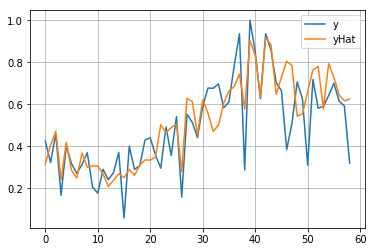

In [26]:
#Plot cost during training:
plot.plot(y)
plot.plot(yHat)
plot.grid(1)
plot.legend(['y', 'yHat'])
plot.show()